# Sesión 8
## Estadistica Aplicada 
**Jose Alfonso Gonzalez Acosta**
- 23 de febrero

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from lifelines.datasets import load_rossi
rossi=load_rossi()

In [7]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [8]:
from lifelines import ExponentialFitter

<AxesSubplot:>

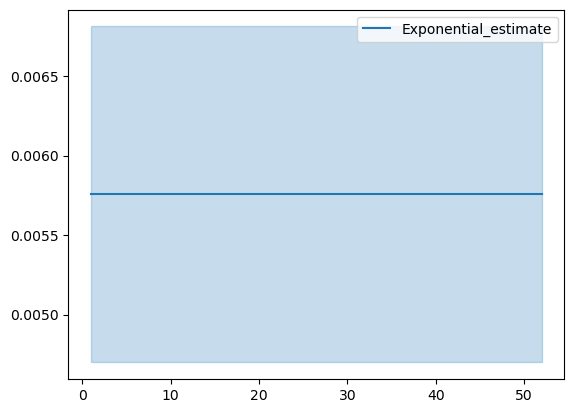

In [26]:
ex1 = ExponentialFitter().fit(rossi['week'],rossi['arrest'])
ex1.plot_hazard()

<AxesSubplot:>

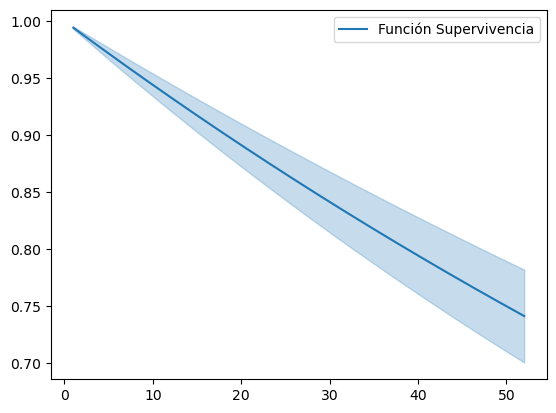

In [28]:
ex1.plot_survival_function(label='Función Supervivencia')

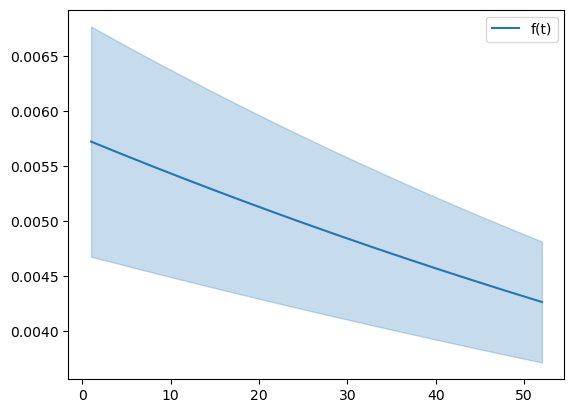

In [29]:
ex1.plot_density(label='f(t)');

# Weibull

In [10]:
from lifelines import WeibullFitter

In [11]:
weib1 = WeibullFitter().fit(rossi['week'],rossi['arrest'])

<AxesSubplot:>

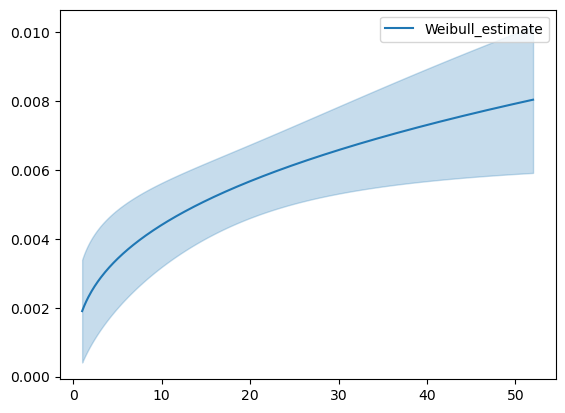

In [12]:
weib1.plot_hazard()

<AxesSubplot:>

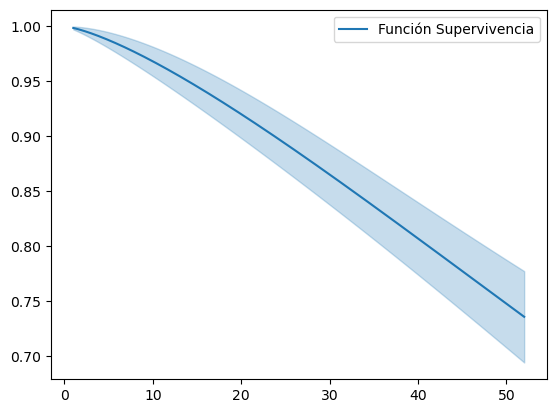

In [24]:
weib1.plot_survival_function(label='Función Supervivencia')

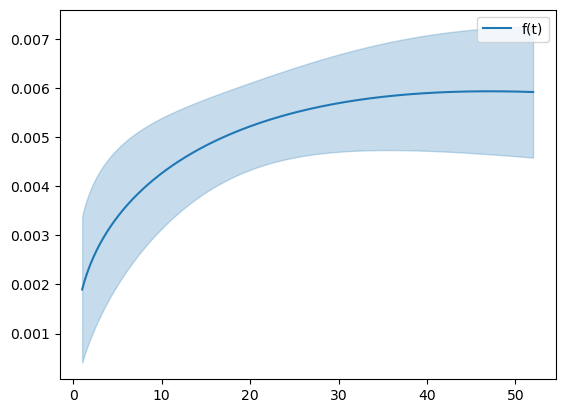

In [23]:
weib1.plot_density(label='f(t)');

In [13]:
weib1.hazard_

,Weibull_estimate
1.000000,0.001901
1.118329,0.001980
1.236659,0.002054
1.354988,0.002124
1.473318,0.002190
...,...
51.526682,0.008018
51.645012,0.008024
51.763341,0.008031
51.881671,0.008038


In [14]:
weib1.hazard_at_times(104.0)

104.0    0.010361
Name: Weibull_estimate, dtype: float64

In [15]:
from lifelines import LogNormalFitter

In [16]:
logn1 = LogNormalFitter().fit(rossi['week'],rossi['arrest'])

<AxesSubplot:>

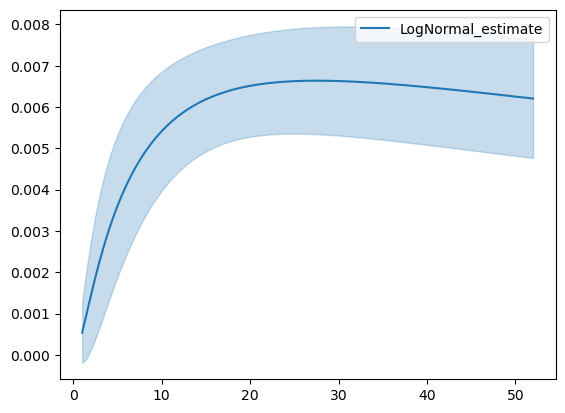

In [17]:
logn1.plot_hazard()

<AxesSubplot:>

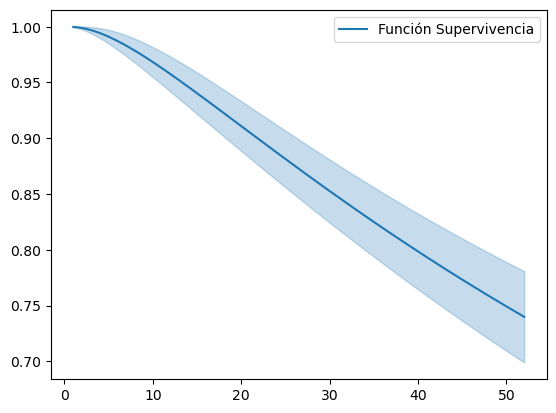

In [21]:
logn1.plot_survival_function(label='Función Supervivencia')

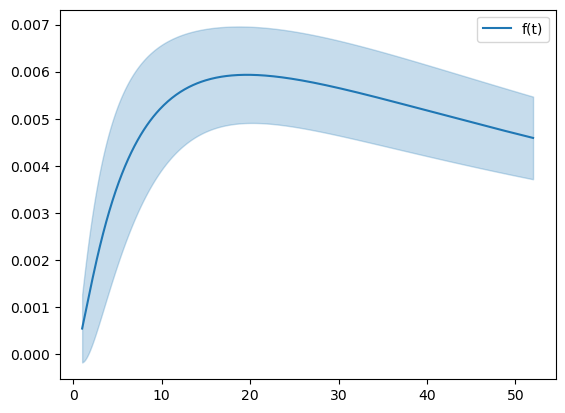

In [22]:
logn1.plot_density(label='f(t)');

In [18]:
logn1.hazard_

,LogNormal_estimate
1.000000,0.000538
1.118329,0.000642
1.236659,0.000749
1.354988,0.000857
1.473318,0.000965
...,...
51.526682,0.006216
51.645012,0.006214
51.763341,0.006211
51.881671,0.006208


Para comparar y elegir el "mejor" modelo se suele usar el criterio de Akaike, mejor conocido como el (AIC). Se calcula de la siguiente manera:

$AIC = -2LogL + 2k $

donde k es el número de parámetros a estimar.

Se considera que el modelo con el menor vallor en el AIC es el mejor modelo.

In [20]:
ex1.AIC_.round(), weib1.AIC_.round(), logn1.AIC_.round()

(1406.0, 1397.0, 1400.0)

El modelo con el menor criterio de Akaike (AIC) es el Weibull, por lo tanto podemos concluir que el tiempo de supervivencia (liberado-arrestado) sigue una distribución de Weibull. La mediana es de 94, lo cual siginfica que el 50% de los individuos ya habían sido arrestados en la semana 94.